## Excersises

1.1
>a) No because there's no analysis, just dividing.
 <br>b) No dividing isn't data mining.
 <br>c) No it's just summing all sales.
 <br>d) No that's just a simple sorting of data.
 <br>e) No because it's a simple mathematical equation for fair dice.
 <br>f) Yes because it's predicting an outcome based on previous data.
 <br>g) Yes because you're comparing against data of known good hearts.
 <br>h) Yes because you're comparing a stream of data against a known normal.
 <br>i) Yes because you're extracting meaningful data from noise.


---


2.2
>a) Binary, qualitative (nominal)
 <br>b) Continuous, quantitative (ratio)
 <br>c) Discrete, qualitative (nominal)
 <br>d) Continuous, quantitative (ratio)
 <br>e) Discrete, qualitative (ordinal)
 <br>f) Continuous, qualitative (interval)
 <br>g) Discrete, quantitative (ratio)
 <br>h) Discrete, qualitative (ordinal)
 <br>i) Discrete, qualitative (ordinal)
 <br>j) Discrete, qualitative (oridnal)
 <br>k) Continuous, quantitative (interval)
 <br>l) Continuous, quantitative (ratio)
 <br>m) Discrete, qualitative (nominal)

---


2.7
> Daily Temperature because the weather is continuous, warming slightly or cooling slightly it is more correlated to the previous temperature opposed to daily rainfall which varies wildy as rain one day is not necessarily related to rain the previous. A month in summer will stay consistenly warm while it may rain 2 days in a row and then be dry for the rest of the month.


---


2.15
>Method A gets elements proportional to the amount in each group, like The House of Representatives where as the Method B disregards the size of each group like The Senate.


---


2.16
>a) If a term is found in all documents, you have *tf*<sub>ij</sub> * Log(m/*df*<sub>i</sub> where m/*df*<sub>i</sub> is 1 and log(1) = 0 so the value goes to zero if the word is frequent and in every document.<br>A term not in every document is just proportional to it's frequency over number of documents it's in.
<br>b) To find terms that signify the meaning of a particular paper, i.e. spaceship appearing many times in a paper about NASA accurately describes the context of the paper, whereas the word 'the' appears in almost every paper and it's significance to anything is almost always negligible.


---


2.17
>a) Corresponding Interval: (a<sup>2</sup>, b<sup>2</sup>)
<br>b) y = x<sup>2</sup>


---


2.18
>a) Hamming: 3 bits are different<br>Jaccard: 2(10-5) = 0.4
<br>b)Hamming, is like the Simple Matching Coefficient because the numerator is the same as the Hamming Distance.<br>Jaccard is similar to the Cosine Measure because both ignore zero matches.
<br>c)We would want to use the Jaccard because it measures the similarity between two values whereas Hamming measures the difference between two values and cares about which parts are different.
<br>d)We want to use the Hamming distance because we're trying to find the amount different in two very similar gene strings. Care more about difference than similarity in this case.


---


2.19
>a) Cosine: 1, Correlation: 0/0, Euclidean = 2
<br>b) Cosine: 0 Correlation: -1 Euclidean: 2 Jaccard: 0
<br>c) Cosine: 0 Correlation: 0 Euclidean: 2
<br>d) Cosine: 0.75 Correlation: 0.25 Jaccard: 0.6
<br>e) Cosine: 0 Correlation: 0

# Practicum


## Problem 1

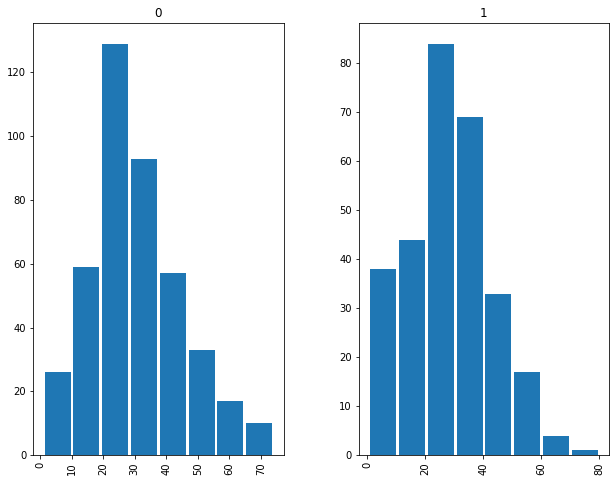

In [7]:
import pandas as pd
titanic_df = pd.read_csv("./Data_Sets/titanic/train.csv")

age_df = titanic_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by="Survived")
titanic_df['AgeSpread'] = pd.cut(titanic_df['Age'], 15)
#age_spread_survival = df[['AgeSpread', 'Survived']].groupby(['AgeSpread'], as_index = False).mean().sort_values(by='AgeSpread', ascending=True)
#age_spread_survival.hist(column = 'AgeSpread')
age_hist = titanic_df.hist(column='Age',by = "Survived",bins=8,grid=False,figsize=(10,8),rwidth = .9)
               

In [0]:
#TODO Gender Hist

## Problem 2

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#Names Attributes
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
auto_df = pd.read_csv("./Data_Sets/auto_mpg/auto-mpg.data", delim_whitespace=True, names=column_names)
auto_df.head()

#Finds missing HP's and replaces with numpy NaN
missing_hp = auto_df[auto_df.horsepower == '?'].index
auto_df.loc[missing_hp]
auto_df.loc[missing_hp, 'horsepower'] = np.nan
auto_df.horsepower  = auto_df.horsepower.apply(pd.to_numeric)

#Impute for Mean